In [2]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import keras.datasets

## 1.1 Load the dataset 

In [3]:
(x_train,y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train.shape, y_test.shape

((60000,), (10000,))

## 1.2 Preprocessing 

In [6]:
def preprocessing(data):
    data = data/255.0
    return data

In [7]:
x1_train  = preprocessing(x_train)
x1_test   = preprocessing(x_test)

## 1.3 Reshape the dataset

In [8]:
re_train = tf.expand_dims(x1_train, axis=-1)
re_test  = tf.expand_dims(x1_test , axis=-1)


In [9]:
## create pipe line for data
train = tf.data.Dataset.from_tensor_slices((re_train,y_train))
test  = tf.data.Dataset.from_tensor_slices((re_test,y_test))

## 1.4 Buid test and train partition

In [10]:
train1 = train.batch(32)
train1 = train1.prefetch(16)

In [11]:
test1 = test.batch(32)
test1 = test1.prefetch(16)

In [12]:
test1.as_numpy_iterator().next()[1].shape

(32,)

# 2 Model Creation

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout

In [14]:
model= Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dense(10, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))




In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8

In [16]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)


In [17]:
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics= ['accuracy'] )

In [18]:
hist = model.fit(train1, epochs=10, validation_data=test1,callbacks=[early_stopping_cb])

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.3132 - accuracy: 0.9050 - val_loss: 0.1286 - val_accuracy: 0.9619
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1027 - accuracy: 0.9689 - val_loss: 0.0800 - val_accuracy: 0.9767
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0755 - accuracy: 0.9772 - val_loss: 0.0683 - val_accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0610 - accuracy: 0.9820 - val_loss: 0.0638 - val_accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0507 - accuracy: 0.9851 - val_loss: 0.0591 - val_accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0431 - accuracy: 0.9874 - val_loss: 0.0560 - val_accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0367 - accuracy: 0.9892 - val_loss: 0.0540 - val_accurac

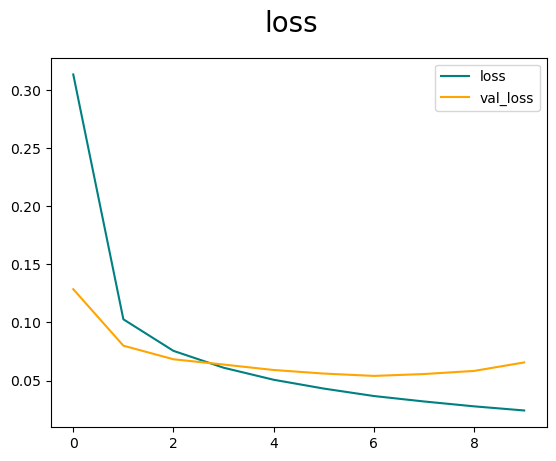

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('loss', fontsize = 20)
plt.legend(loc='upper right')
plt.show()


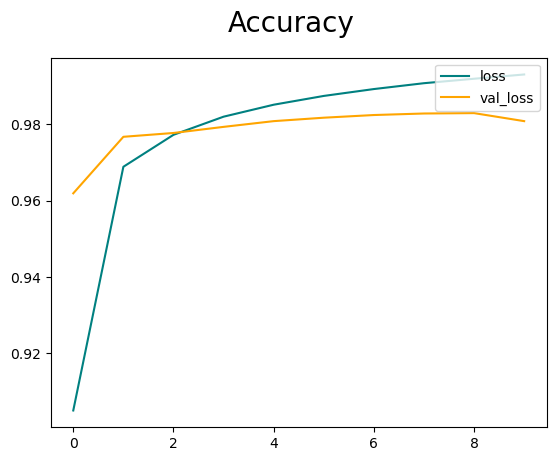

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_loss')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc='upper right')
plt.show()


In [36]:
sample_test_data = test1.as_numpy_iterator().next()

In [42]:
sample_test_data[0].shape

(32, 28, 28, 1)

In [43]:
sample_test_data[1].shape

(32,)

In [27]:
number, label = sample_test_data.next()

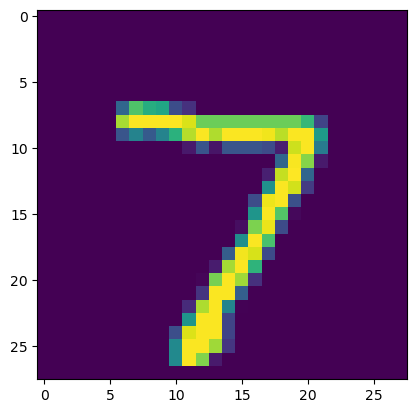

In [28]:
plt.imshow(number[0])

# 3 Evaluation and testing

## 3.1 Evaluation

In [24]:
test_loss , test_accuracy= model.evaluate(number, label)
print('test loss on 10000 test samples', test_loss)
print('test accuracy on 10000 test samples', test_accuracy)

1/1 [==============================] - 0s 94ms/step - loss: 0.0443 - accuracy: 0.9688
test loss on 10000 test samples 0.044334813952445984
test accuracy on 10000 test samples 0.96875


## 3.2 Prediction

In [47]:
## These predictions are based on one hot encoerding, so these values are 10 values of each test values
pred = np.argmax(model.predict(sample_test_data[0]),axis=1)

1/1 [==============================] - 0s 20ms/step


In [48]:
### View 10 softmax values of a sample number, each number contain, 10 values
pred[0]

7

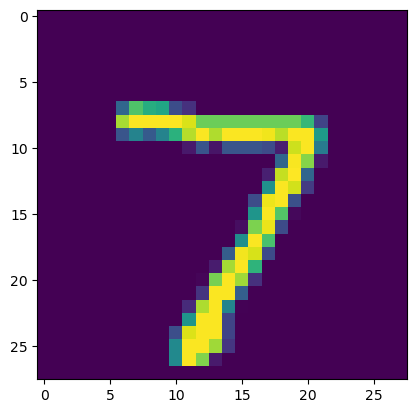

In [55]:
plt.imshow(sample_test_data[0][0])
plt.show()

## 3.3 Evaluation

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
y_true = sample_test_data[1]
y_pred = np.argmax((model.predict(sample_test_data[0])),axis=1)

1/1 [==============================] - 0s 16ms/step


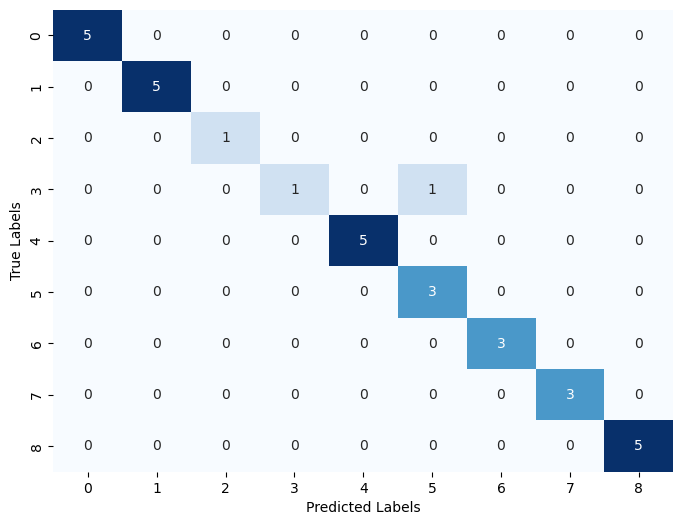

In [66]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix.png')
plt.show()

In [67]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)#, target_names=class_names)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         5
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         5

    accuracy                           0.97        32
   macro avg       0.97      0.94      0.95        32
weighted avg       0.98      0.97      0.97        32

